In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [12]:
def create_bell_pair(qc, a, b):
    qc.h(a)       # Apply Hadamard on qubit a
    qc.cx(a, b)   # Apply CNOT with control=a and target=b


In [13]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass
    elif msg == "01":
        qc.z(qubit)
    elif msg == "10":
        qc.x(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("Invalid message! Defaulting to '00'")


In [14]:
def decode_message(qc, a, b):
    qc.cx(a, b)   # Apply CNOT
    qc.h(a)       # Apply Hadamard on qubit a


In [15]:
# Create a 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 1: Create Bell Pair
create_bell_pair(qc, 0, 1)
qc.barrier()

# Step 2: User input for message
message = input("Enter 2-bit message to send (00, 01, 10, 11): ").strip()
print(f"Alice wants to send: {message}")

# Step 3: Encode message (Alice)
encode_message(qc, 0, message)
qc.barrier()

# Step 4: Decode message (Bob)
decode_message(qc, 0, 1)
qc.barrier()

# Step 5: Measure to get classical bits
qc.measure_all()


Alice wants to send: 11


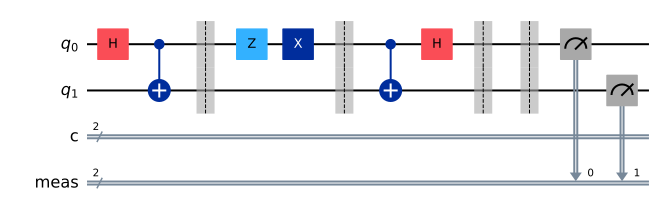

In [16]:
# Show circuit
qc.draw(output='mpl')
